In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [29]:
# Strukturindikatoren
struktur = pd.read_csv('../../../Daten/strukturindikatoren_gesamt.csv', index_col = 0)
struktur_13 = struktur[['Gebietsnummer', 'Anteil Deutsche Bevölkerung 2013',
       'Anteil Nichtdeutsche EU Bevölkerung 2013',
       'Anteil Nichtdeutsche nicht EU Bevölkerung 2013', 'Anteil Migrationshintergrund Bevölkerung 2013', 
        'Anteil Verheiratete Bevölkerung 2013', 'Anteil 18 - 24 Jährige Wahlberechtigte 2013',
       'Anteil 25 - 34 Jährige Wahlberechtigte 2013',
       'Anteil 35 - 44 Jährige Wahlberechtigte 2013',
       'Anteil 45 - 59 Jährige Wahlberechtigte 2013',
       'Anteil 60 Jährige und ältere Wahlberechtigte 2013', 'Anteil Einpersonenhaushalte 2013', 
        'Anteil Haushalte mit Kind(ern) 2013', 'SV-Beschäftigtendichte 2013',
       'Arbeitslosendichte 2013', 'ALG II - Empfängerdichte 2013']]
struktur_17 = struktur[['Gebietsnummer', 'Anteil Deutsche Bevölkerung 2017',
       'Anteil Nichtdeutsche EU Bevölkerung 2017',
       'Anteil Nichtdeutsche nicht EU Bevölkerung 2017', 'Anteil Migrationshintergrund Bevölkerung 2017', 
        'Anteil Verheiratete Bevölkerung 2017', 'Anteil 18 - 24 Jährige Wahlberechtigte 2017',
       'Anteil 25 - 34 Jährige Wahlberechtigte 2017',
       'Anteil 35 - 44 Jährige Wahlberechtigte 2017',
       'Anteil 45 - 59 Jährige Wahlberechtigte 2017',
       'Anteil 60 Jährige und ältere Wahlberechtigte 2017', 'Anteil Einpersonenhaushalte 2017', 
        'Anteil Haushalte mit Kind(ern) 2017', 'SV-Beschäftigtendichte 2017',
       'Arbeitslosendichte 2017', 'ALG II - Empfängerdichte 2017']]
struktur_20 = struktur[['Gebietsnummer', 'Anteil Deutsche Bevölkerung 2020',
       'Anteil Nichtdeutsche EU Bevölkerung 2020',
       'Anteil Nichtdeutsche nicht EU Bevölkerung 2020', 'Anteil Migrationshintergrund Bevölkerung 2020', 
        'Anteil Verheiratete Bevölkerung 2020', 'Anteil 18 - 24 Jährige Wahlberechtigte 2020',
       'Anteil 25 - 34 Jährige Wahlberechtigte 2020',
       'Anteil 35 - 44 Jährige Wahlberechtigte 2020',
       'Anteil 45 - 59 Jährige Wahlberechtigte 2020',
       'Anteil 60 Jährige und ältere Wahlberechtigte 2020', 'Anteil Einpersonenhaushalte 2020', 
        'Anteil Haushalte mit Kind(ern) 2020', 'SV-Beschäftigtendichte 2020',
       'Arbeitslosendichte 2020', 'Erwerbsfähige Leistungsberechtigtendichte 2020']]
# Wahlergebnisse
erst_17 = pd.read_csv('../../../Daten/erststimmen_aufbereitet.csv')
zweit_17 = pd.read_csv('../../../Daten/zweitstimmen_aufbereitet.csv')
erst_13 = pd.read_csv('../../../Daten/erststimmen_13.csv', index_col = 0)
zweit_13 = pd.read_csv('../../../Daten/zweitstimmen_13.csv', index_col = 0)

In [30]:
wahl_13_erst = erst_13.merge(struktur_13, on = 'Gebietsnummer')
wahl_13_zweit = zweit_13.merge(struktur_13, on = 'Gebietsnummer')
wahl_17_erst = erst_17.merge(struktur_17, on = 'Gebietsnummer')
wahl_17_zweit = zweit_17.merge(struktur_17, on = 'Gebietsnummer')

In [31]:
struktur_diff = pd.read_csv('../../../Daten/differenz_struktur_17_13.csv', index_col = 0)
wahl_diff = pd.read_csv('../../../Daten/bt_wahl_13/gesamt.csv', index_col = 0)

In [32]:
wahl_erst_diff = wahl_diff[['Gebietsnummer', 'Diff_erst_CSU', 'Diff_erst_SPD', 'Diff_erst_GRÜNE',
                           'Diff_erst_FDP', 'Diff_erst_DIE LINKE', 'Diff_erst_AfD']]
wahl_zweit_diff = wahl_diff[['Gebietsnummer', 'Diff_zweit_CSU', 'Diff_zweit_SPD', 'Diff_zweit_GRÜNE',
                           'Diff_zweit_FDP', 'Diff_zweit_DIE LINKE', 'Diff_zweit_AfD']]

In [33]:
wahl_erst = wahl_erst_diff.merge(struktur_diff, on = 'Gebietsnummer')
wahl_zweit = wahl_zweit_diff.merge(struktur_diff, on = 'Gebietsnummer')

In [34]:
wahlbezirke = gpd.read_file('../../../Daten/wahlbezirke.shp')
stadtteile = gpd.read_file('../../../Daten/stadtteile.shp')

wahlbezirke = wahlbezirke.rename(columns = {'Gebietsnum': 'Gebietsnummer'})

### Verluste SPD

In [35]:
diff_spd_plot = wahlbezirke.set_index('Gebietsnummer').join(wahl_diff.set_index('Gebietsnummer'))

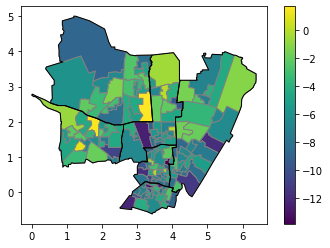

In [36]:
fig, ax = plt.subplots()
diff_spd_plot.plot(ax = ax, column = 'Diff_erst_SPD', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

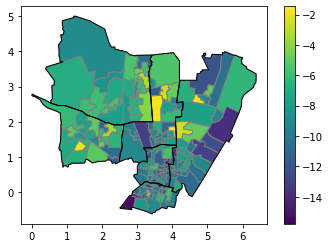

In [37]:
fig, ax = plt.subplots()
diff_spd_plot.plot(ax = ax, column = 'Diff_zweit_SPD', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

# Struktur 2017

In [38]:
merge_struktur = struktur.merge(struktur_diff, on = 'Gebietsnummer')
plot_data = wahlbezirke.set_index('Gebietsnummer').join(merge_struktur.set_index('Gebietsnummer'))

## Demographische Struktur

Demographische Struktur der Wahlberechtigten Bürger in den Wahlbezirken.

In [40]:
merge_struktur.columns

Index(['Gebietsnummer', 'Bevölkerung 2013', 'Bevölkerung 2017',
       'Bevölkerung 2020', 'Anteil Deutsche Bevölkerung 2013',
       'Anteil Nichtdeutsche EU Bevölkerung 2013',
       'Anteil Nichtdeutsche nicht EU Bevölkerung 2013',
       'Anteil Deutsche Bevölkerung 2017',
       'Anteil Nichtdeutsche EU Bevölkerung 2017',
       'Anteil Nichtdeutsche nicht EU Bevölkerung 2017',
       'Anteil Deutsche Bevölkerung 2020',
       'Anteil Nichtdeutsche EU Bevölkerung 2020',
       'Anteil Nichtdeutsche nicht EU Bevölkerung 2020',
       'Anteil Migrationshintergrund Bevölkerung 2013',
       'Anteil Migrationshintergrund Bevölkerung 2017',
       'Anteil Migrationshintergrund Bevölkerung 2020',
       'Anteil Ledige Bevölkerung 2013',
       'Anteil Verheiratete Bevölkerung 2013',
       'Anteil Ledige Bevölkerung 2017',
       'Anteil Verheiratete Bevölkerung 2017',
       'Anteil Ledige Bevölkerung 2020',
       'Anteil Verheiratete Bevölkerung 2020',
       'Anteil 18 - 24 Jährige 

### 18 - 24 Jährige

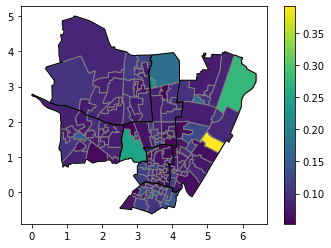

In [21]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Anteil 18 - 24 Jährige Wahlberechtigte 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

### 25 - 34 Jährige

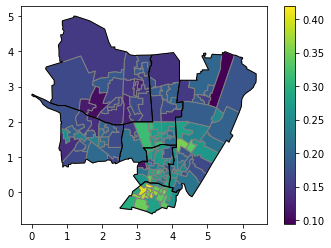

In [22]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Anteil 25 - 34 Jährige Wahlberechtigte 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

### 35 - 44 Jährige

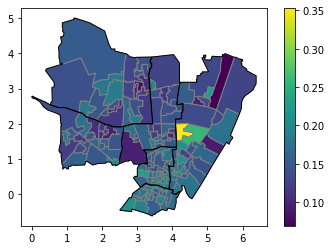

In [23]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Anteil 35 - 44 Jährige Wahlberechtigte 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

### 45 - 59 Jährige

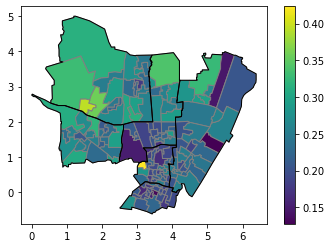

In [24]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Anteil 45 - 59 Jährige Wahlberechtigte 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

### 60 Jahre und älter

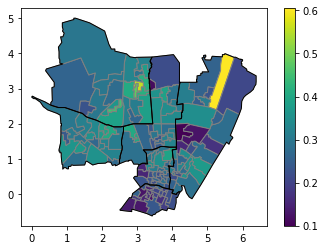

In [25]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Anteil 60 Jährige und ältere Wahlberechtigte 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

## Migrationshintergrund

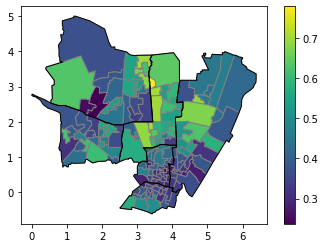

In [26]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Anteil Migrationshintergrund Bevölkerung 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

### Anteil nichtdeutsche EU-Bevölkerung

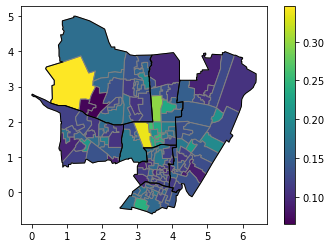

In [20]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Anteil Nichtdeutsche EU Bevölkerung 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

### Anteil nichtdeutsche nicht-EU-Bevölkerung

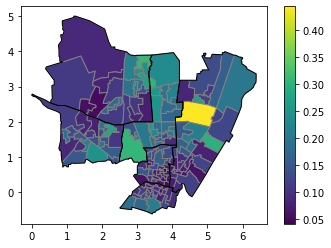

In [21]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Anteil Nichtdeutsche nicht EU Bevölkerung 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

## Familienstatus

Verheiratete

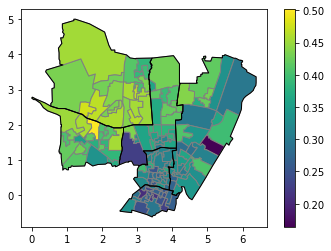

In [30]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Anteil Verheiratete Bevölkerung 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

Ledige

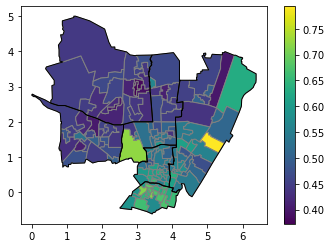

In [31]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Anteil Ledige Bevölkerung 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

## Einpersonenhaushalte

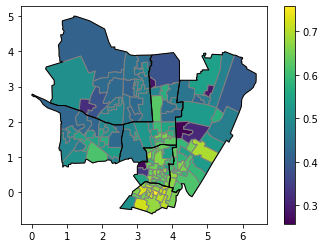

In [32]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Anteil Einpersonenhaushalte 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

## Haushalte mit Kindern

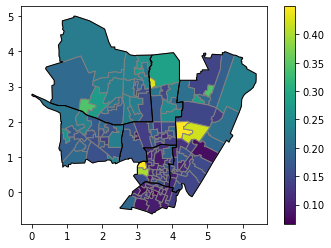

In [33]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Anteil Haushalte mit Kind(ern) 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

## Durchschnittliche Wohndauer

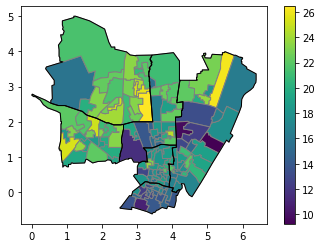

In [21]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'durchschnittliche Wohndauer 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

## Wahlbeteiligung

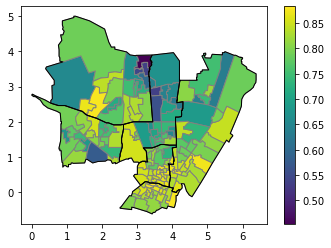

In [37]:
fig, ax = plt.subplots()
plot_data.plot(ax = ax, column = 'Wahlbeteiligung 2017', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()